# Part 1

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
df = pd.read_csv('framingham_heart_disease.csv')

In [3]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Section 1- Research question
We would like to explore the relations between: Number of cigaretes per day (discrete), total cholesterol (continous), diaBP (diastolic BP) and sysBP (systolic BP - continous). <br>
Hence, our research question would be:
**What are the effects of number of cigaretes per day, total cholesterol and diaBP over sysBP**

In [4]:
df.dropna(subset=['cigsPerDay', 'totChol', 'diaBP', 'sysBP'], inplace=True)

### Section 2 - TODO: check if need to split to train-test

In [5]:
# df = df.sample(200)
# test_size = 1-200/len(df)
df_train, df_test, y_train, y_test = train_test_split(df[['cigsPerDay', 'totChol', 'diaBP']], df[['sysBP']], test_size=0.9519115171916326, random_state=42)

### Section 3.a

<AxesSubplot:>

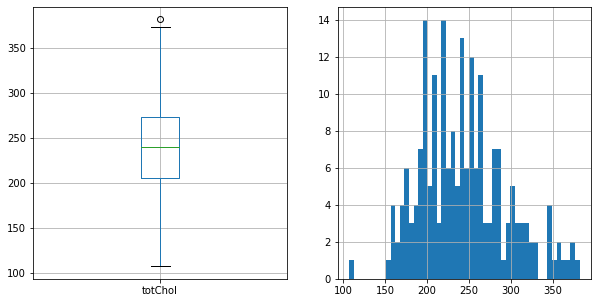

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_train.boxplot(column=['totChol'], ax=axes[0])
df_train['totChol'].hist(bins=50, ax=axes[1])

<AxesSubplot:>

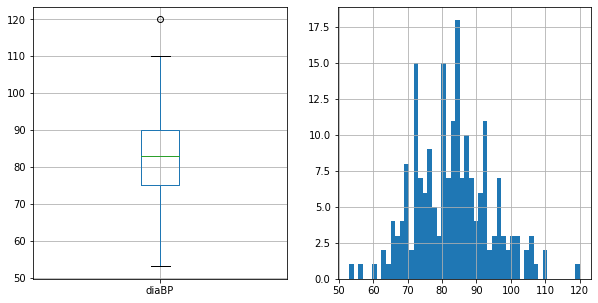

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_train.boxplot(column=['diaBP'], ax=axes[0])
df_train['diaBP'].hist(bins=50, ax=axes[1])

<AxesSubplot:>

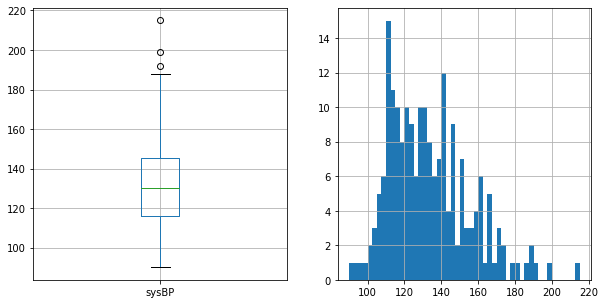

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
y_train.boxplot(column=['sysBP'], ax=axes[0])
y_train['sysBP'].hist(bins=50, ax=axes[1])

In [9]:
df_train.groupby('cigsPerDay').count().rename(columns={'totChol': 'count'})[['count']].transpose()

cigsPerDay,0.0,1.0,2.0,3.0,4.0,5.0,9.0,10.0,13.0,15.0,18.0,20.0,25.0,30.0,35.0,40.0,43.0,60.0
count,88,6,1,6,1,3,9,2,1,12,1,42,2,13,3,7,2,1


### Section 3.b
<ins>Missing values:</ins> We had NaN values for some of the columns but we took care of it by droping the rows containing them before section 2. Other methods of taking care of them would be to replace them with the average or median for example. Since we want to get a grasp of the relations between explaining variables to the explained variable, we would like to first use non-missing values to try and see the closest estimation for the real relationship.
<br><br>
<ins>abnormal data:</ins> There are few outliers in each of the continous variables and it is always after the upper whisker  and not below the lower whisker.Moreover, when looking at the cigsPerDay histogram we can see that there are many people not smoking (0 per day) and than many people smoking 20 cigaretes per day with lower volumes in between. This observation could indicate anomally which could result from the way the data was collected or other fenomenas related to people who smoke.
<br><br>
<ins>Distribution of the variables:</ins> We can see that the histogram of totChol and diaBP resembles normal distribution, and the sysBP's histogram resembles chi-squre or gamma distribution since it seems to have a heavy tail in contrast to the first two variables.
Estimating the distribution of cigsPerDay is harder since it is discrete but it looks like multinomial with higher probabilities for 0 & 20.

### Section 3.c

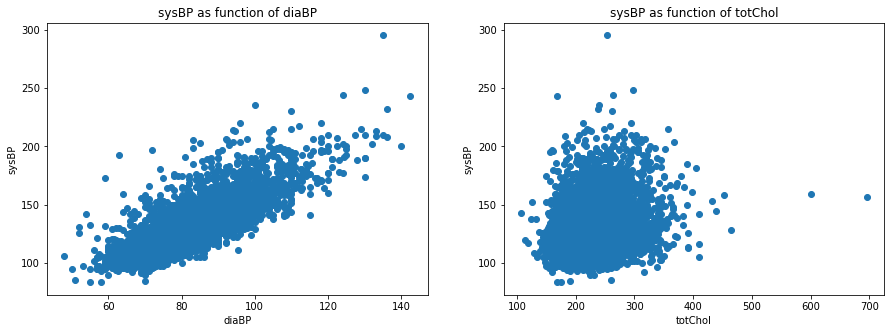

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for i, col in enumerate(['diaBP', 'totChol']):
    axes[i].scatter(df[col], df['sysBP'])
    axes[i].set_title(f'sysBP as function of {col}')
    axes[i].set_ylabel('sysBP')
    axes[i].set_xlabel(f'{col}')

<ins>Concolusion:</ins> It looks like diaBP column has strong positive correlation with sysBP, while the totChol has almost no correlation at all to sysBP.

### Section 3.d

Text(0, 0.5, 'sysBP')

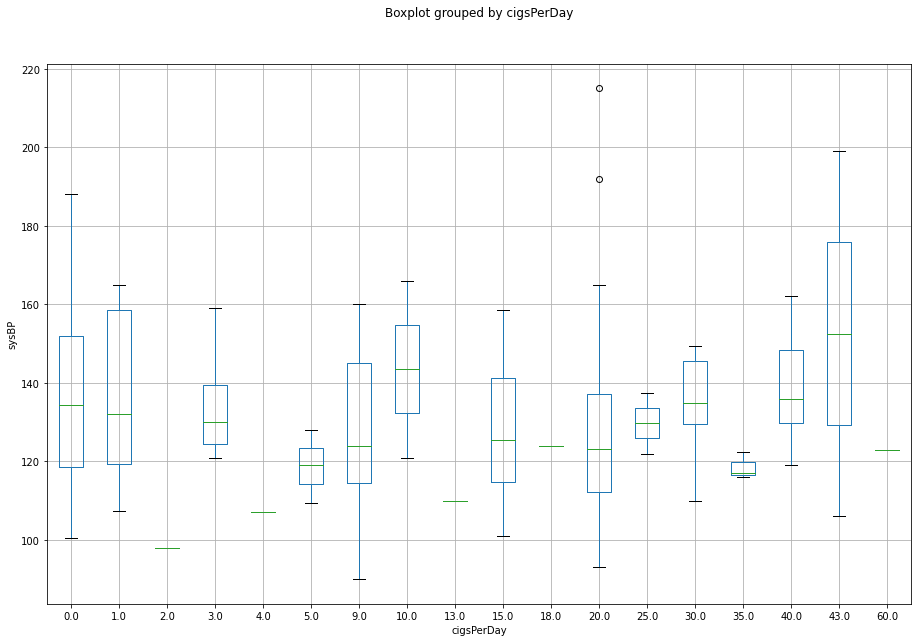

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
df_cigsSysBp = pd.concat([df_train[['cigsPerDay']], y_train], axis=1)
df_cigsSysBp.boxplot(by='cigsPerDay', ax=axes)
axes.set_title('')
axes.set_xlabel('cigsPerDay')
axes.set_ylabel('sysBP')

In [17]:
X = sm.add_constant(df_train)  # add bias
model = sm.OLS(y_train,X)
results = model.fit()

/home/dvir/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
results.params

const        -6.795017
cigsPerDay   -0.002428
totChol       0.055739
diaBP         1.520925
dtype: float64

As we concluded from the scatter plots, we can see that diaBP has the largest absolute value of multiplier in $\hat{\beta}$ while cigsPerDay and totChol's multipliers are closer to zero.

In [22]:
for col in df_train.columns:
    temp_df = df_train.copy()
    temp_df[col] += 1
    X = sm.add_constant(temp_df)  # add bias
    model = sm.OLS(y_train,X)
    results = model.fit()
    print(col)
    print(results.params, '\n')

cigsPerDay
const        -6.792589
cigsPerDay   -0.002428
totChol       0.055739
diaBP         1.520925
dtype: float64 

totChol
const        -6.850756
cigsPerDay   -0.002428
totChol       0.055739
diaBP         1.520925
dtype: float64 

diaBP
const        -8.315941
cigsPerDay   -0.002428
totChol       0.055739
diaBP         1.520925
dtype: float64 



We can see that for each column we increased by one unit, the constants (bias) multiplier's absolute value 